1. Importar Librerías

In [127]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CocoDetection
import torchvision
from IPython import display
from torchvision import transforms
from torch.utils import data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw

2. Cargar Datos Visualización y Preprocesamiento

In [128]:
# Cargar el dataset de MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Aplanar las imágenes de 28x28 a vectores de 784 elementos
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convertir las etiquetas a matrices de una columna
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

df_X_train = pd.DataFrame(X_train)
df_y_train = pd.DataFrame(y_train)
df_X_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)

In [129]:
print(df_X_train[:5])
print(df_y_train[:5])

   0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]
   0
0  5
1  0
2  4
3  1
4  9


In [130]:
# Cargar el dataset de MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los pixeles de las imágenes (0-255), escalándolas entre 0 y 1.
X_train, X_test = X_train / 255.0, X_test / 255.0

# Función para visualizar múltiples muestras de datos
def visualize_samples(X, y, indices):
    fig, axes = plt.subplots(1, len(indices), figsize=(10, 2))
    for i, index in enumerate(indices):
        axes[i].imshow(X[index], cmap='gray')
        axes[i].set_title(f'Target: {y[index]}')
        axes[i].axis('off')
    plt.show()

# Dimensiones Conjunto de Entrenamiento y Prueba
print(f"Tamaño Entrenamiento: {X_train.shape}")
print(f"Tamaño Prueba: {X_test.shape}")


Tamaño Entrenamiento: (60000, 28, 28)
Tamaño Prueba: (10000, 28, 28)


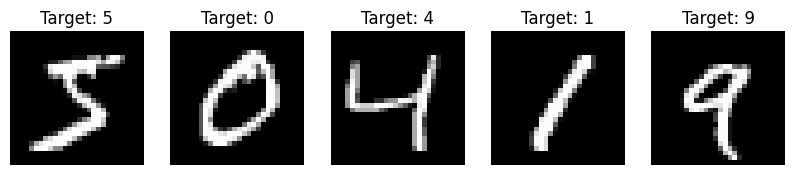

In [131]:
# Visualizar una muestra de datos del conjunto de Entrenamiento
sample_indices = [0, 1, 2, 3, 4]
visualize_samples(X_train, y_train, sample_indices)

In [132]:
# Convertimos las Imágenes en Tensores.
X_train = torch.tensor(X_train).unsqueeze(1).float()
X_test = torch.tensor(X_test).unsqueeze(1).float()
y_train = torch.tensor(y_train).long()
y_test = torch.tensor(y_test).long()

# Se crean los Cargadores de Datos para Entrenamiento y Prueba.
train_loader = data.DataLoader(data.TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = data.DataLoader(data.TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

70.000 Imágenes de dígitos escritos a mano, del 0 al 9. Cada imagen es de 28x28 pixeles en escala de grises.

3. Función de Activación

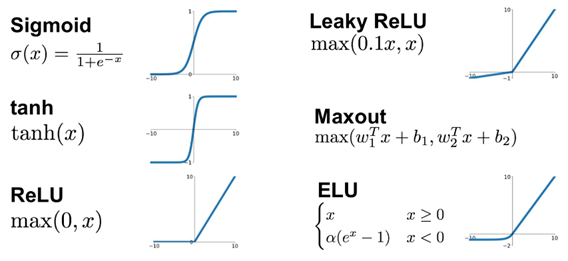

### ReLU

$$\operatorname{ReLU}(x) = \max(0, x)$$


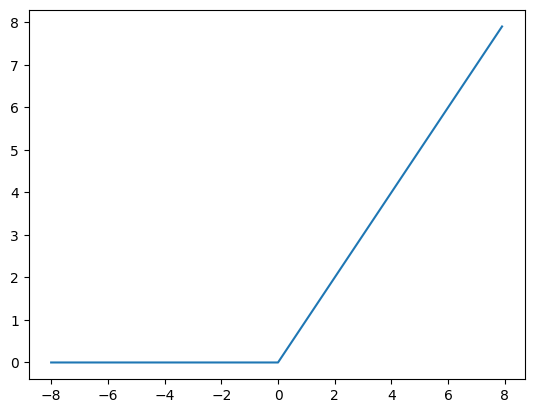

In [133]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach())

4. Definición de la Red Neuronal Convolucional

In [134]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

# Inicializar la red, la función de pérdida y el optimizador
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

 La red tiene dos capas Convolucionales seguidas de Capas de Pooling (Agrupación), y dos Capas completamente conectadas. La función de activación Relu se usa después de cada Capa convolucional y Completamente Conectada.

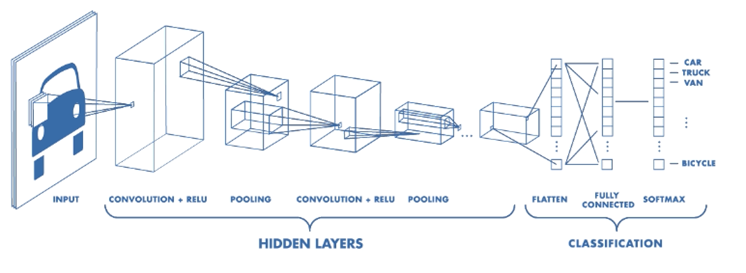

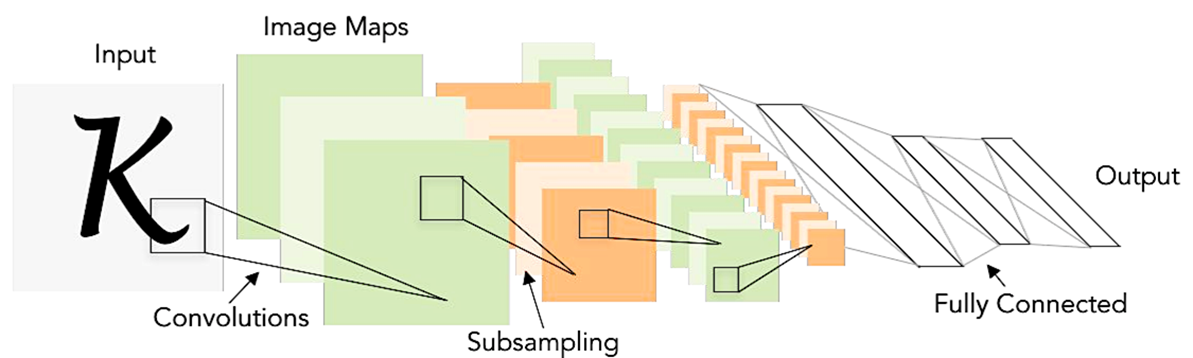

5. Entrenamiento del Modelo

In [118]:
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train

        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

 Durante cada época (epoch), el modelo se entrena con el conjunto de datos de entrenamiento, calculando la pérdida y ajustando los pesos y sesgos mediante retropropagación.

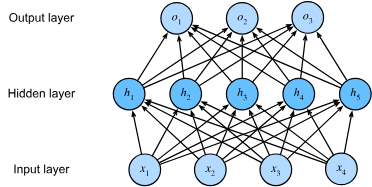

5. Evaluación del Modelo

In [135]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

Se evalúa el rendimiento del modelo en el conjunto de datos de prueba. Se calcula la precisión del modelo comparando las predicciones vs las etiquetas reales.

6. Visualización Resultados

In [136]:
def visualize_results(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    fig = plt.figure(figsize=(12, 8))
    for i in range(6):
        ax = fig.add_subplot(2, 3, i+1, xticks=[], yticks=[])
        plt.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f'Predicted: {predicted[i].item()}')
    plt.show()

7. Entrenamiento y Evaluación del Modelo

Epoch [1/10], Loss: 1.6234, Train Accuracy: 84.24%, Test Accuracy: 89.08%
Epoch [2/10], Loss: 1.5704, Train Accuracy: 89.07%, Test Accuracy: 89.48%
Epoch [3/10], Loss: 1.5107, Train Accuracy: 95.10%, Test Accuracy: 98.31%
Epoch [4/10], Loss: 1.4777, Train Accuracy: 98.41%, Test Accuracy: 98.15%
Epoch [5/10], Loss: 1.4744, Train Accuracy: 98.72%, Test Accuracy: 98.75%
Epoch [6/10], Loss: 1.4730, Train Accuracy: 98.85%, Test Accuracy: 98.74%
Epoch [7/10], Loss: 1.4709, Train Accuracy: 99.05%, Test Accuracy: 98.80%
Epoch [8/10], Loss: 1.4701, Train Accuracy: 99.13%, Test Accuracy: 98.80%
Epoch [9/10], Loss: 1.4692, Train Accuracy: 99.23%, Test Accuracy: 98.80%
Epoch [10/10], Loss: 1.4688, Train Accuracy: 99.24%, Test Accuracy: 99.04%
Accuracy: 99.04%


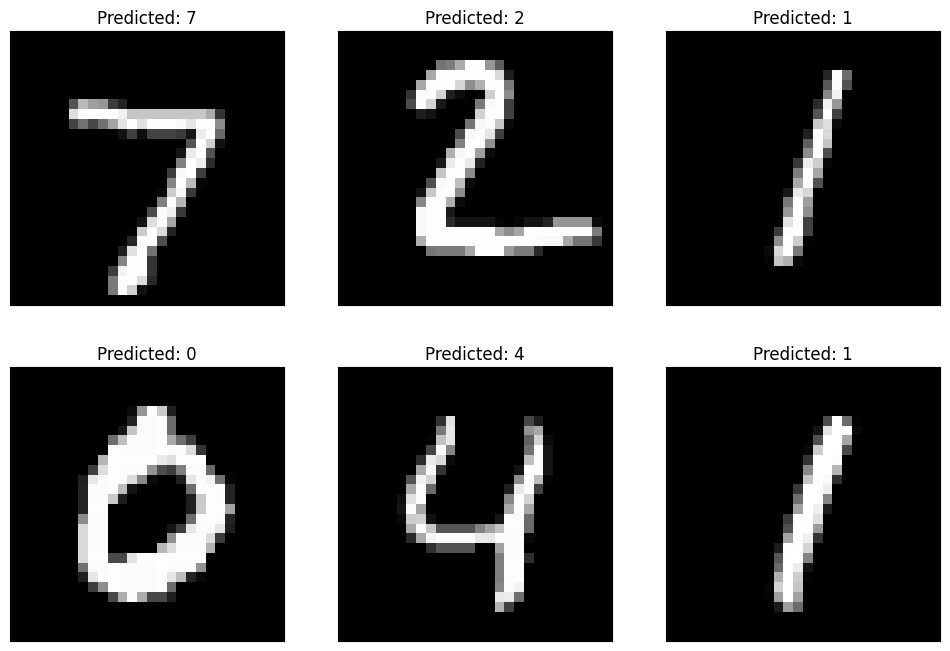

In [137]:
epochs = 10
train_model(model, train_loader, test_loader, criterion, optimizer, epochs)
evaluate_model(model, test_loader)
visualize_results(model, test_loader)

Se entrena el Modelo de acuerdo al N° de Épocas que indique el usuario final. En cada una de ellas se evalúa la pérdida y precisión del modelo en los conjuntos de Entrenamiento y Pruebas. También se visualizan algunos resultados.

---------------------------------------------------------------------------

4. Inicialización de Pesos y Sesgos

In [ ]:
def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

Los Pesos y Sesgos son parámetros que la red ajusta durante el entrenamiento para aprender a hacer predicciones precisas.

Pesos (W): Importancia de cada Entrada.

Sesgos (b): Ajustan la salida de Neuronas.

5. Entrenamiento del Modelo

In [ ]:
def train(X, y, W1, b1, W2, b2, epochs, lr):
    for epoch in range(epochs):
        # Forward Propagation
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Cálculo del error
        loss = mse(y, a2)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

        # Backward propagation
        d_loss_a2 = 2 * (a2 - y) / y.size
        d_a2_z2 = sigmoid_derivative(a2)
        d_z2_W2 = a1.T
        d_z2_b2 = 1

        d_z2 = d_loss_a2 * d_a2_z2
        d_W2 = np.dot(d_z2_W2, d_z2)
        d_b2 = np.sum(d_z2 * d_z2_b2, axis=0, keepdims=True)

        d_a1_z1 = sigmoid_derivative(a1)
        d_z1_W1 = X.T
        d_z1 = np.dot(d_z2, W2.T) * d_a1_z1
        d_W1 = np.dot(d_z1_W1, d_z1)
        d_b1 = np.sum(d_z1, axis=0, keepdims=True)

        # Actualización de los pesos y sesgos
        W2 -= lr * d_W2
        b2 -= lr * d_b2
        W1 -= lr * d_W1
        b1 -= lr * d_b1

    return W1, b1, W2, b2

Durante el entrenamiento, el modelo ajusta sus parámetros (Pesos y Sesgos), minimzando el error.

Forward Propagation: Calcula las salidas de cada capa.

Cálculo del Error: Compara las predicciones vs los valores reales.

Backward Propagation: Ajusta los pesos y sesgos basados en el error.

6. Definición de Parámetros y Entrenamiento

In [ ]:
input_size = 784
hidden_size = 69
output_size = 5
epochs = 10
learning_rate = 0.1

# Inicialización y entrenamiento
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
W1, b1, W2, b2 = train(X_train, y_train, W1, b1, W2, b2, epochs, learning_rate)


Epoch 0, Loss: 25.846672875158152


input_size: El número de entradas (784 imágenes de 28x28).

hidden_size: El número de neuronas en la capa oculta.

output_size: El número de posibles salidas (0-9).

epochs: El número de veces que el modelo verá todos los datos.

learning_rate: La tasa a la que el modelo ajusta sus pesos.

7. Predicción

In [ ]:
def predict(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return np.argmax(a2, axis=1)

predictions = predict(X_test, W1, b1, W2, b2)
print(f"Predicciones: {predictions}")

Predicciones: [2 3 2 ... 2 1 0]


Se define una función para hacer predicciones y se prueba el modelo con el conjunto de prueba.

Forward Propagation: Calcula las salidas para nuevas entradas.

np.argmax: Encuentra el índice de la neurona con la mayor activación, que corresponde al dígito predicho.